# Quick Exploratory Data Analysis

This notebook performs a short, reproducible EDA of the dataset in `data/dataset` (x_train, x_test, y_train, sample_submission). It focuses on shape, basic statistics, missingness, class balance and a few simple plots.

In [ ]:
import numpy as np 


In [1]:
# Load data (adjust paths if needed)
import os
import pandas as pd
import numpy as np
import helpers

DATA_DIR = os.path.join('data', 'dataset')
print('Data dir:', os.path.abspath(DATA_DIR))

x_train_np, x_test_np, y_train_np, train_ids, test_ids = helpers.load_csv_data(DATA_DIR)
# Convert to pandas for EDA convenience
x_train = pd.DataFrame(x_train_np)
x_test = pd.DataFrame(x_test_np)
y_train = pd.Series(y_train_np, name='target')

# sample_submission is kept as DataFrame
sample_submission = pd.read_csv(os.path.join('data', 'dataset', 'sample_submission.csv'))

print('Loaded: x_train, x_test, y_train (via helpers.load_csv_data), sample_submission')

# Show shapes
print('x_train.shape =', x_train.shape)
print('x_test.shape  =', x_test.shape)
print('y_train.shape =', y_train.shape)
print('sample_submission.shape =', sample_submission.shape)

Data dir: /Users/badralmahouri/Documents/uni/EPFL/Master/ML/CS-433-ML-Course-Projects/Project 1/data/dataset
Loaded: x_train, x_test, y_train (via helpers.load_csv_data), sample_submission
x_train.shape = (328135, 321)
x_test.shape  = (109379, 321)
y_train.shape = (328135,)
sample_submission.shape = (109379, 2)
Loaded: x_train, x_test, y_train (via helpers.load_csv_data), sample_submission
x_train.shape = (328135, 321)
x_test.shape  = (109379, 321)
y_train.shape = (328135,)
sample_submission.shape = (109379, 2)


In [17]:
train_ids

array([     0,      1,      2, ..., 328132, 328133, 328134],
      shape=(328135,))

In [2]:
# Show head and labels distribution
x_train.head()

y_train.head()

print('\nLabel distribution:')
print(y_train.value_counts(dropna=False))
print('\nProportion:')
print(y_train.value_counts(normalize=True))


Label distribution:
target
-1    299160
 1     28975
Name: count, dtype: int64

Proportion:
target
-1    0.911698
 1    0.088302
Name: proportion, dtype: float64


In [3]:
# Basic statistics and missing values
print('\nX_train dtypes:\n', x_train.dtypes.value_counts())
print('\nMissing values per column (x_train):')
print(x_train.isna().sum().sort_values(ascending=False).head(10))

# Numeric summary for a few columns (sample up to 10 columns if many)
num_cols = x_train.select_dtypes(include=[np.number]).columns.tolist()
print('\nNumber of numeric columns:', len(num_cols))
print('\nNumeric describe (sample of columns):')
print(x_train[num_cols[:10]].describe().T)


X_train dtypes:
 float64    321
Name: count, dtype: int64

Missing values per column (x_train):
11     328103
14     328103
191    327956
148    327907
147    327907
152    327793
154    327650
153    327650
151    327649
150    327648
dtype: int64
11     328103
14     328103
191    327956
148    327907
147    327907
152    327793
154    327650
153    327650
151    327649
150    327648
dtype: int64

Number of numeric columns: 321

Numeric describe (sample of columns):
      count          mean           std           min           25%  \
0  328135.0  2.997365e+01  1.603178e+01  1.000000e+00  1.900000e+01   
1  328135.0  6.360690e+00  3.487263e+00  1.000000e+00  3.000000e+00   
2  328135.0  6.563638e+06  3.489248e+06  1.012016e+06  3.232015e+06   
3  328135.0  6.416661e+00  3.492739e+00  1.000000e+00  3.000000e+00   
4  328135.0  1.449623e+01  8.334495e+00  1.000000e+00  8.000000e+00   
5  328135.0  2.015025e+03  1.553873e-01  2.015000e+03  2.015000e+03   
6  328135.0  1.115015e+03  3.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,-0.019665,-0.006838,-0.007151,0.013403,-0.049458,-0.041682,-0.038158,-0.038158,NaN,0.003548,NaN,NaN,0.019200,-0.082985,0.019526,0.011663,0.015276,NaN,NaN
1,-0.019665,1.000000,0.869030,0.869151,-0.041483,0.219106,0.006589,0.247005,0.247005,NaN,-0.000296,NaN,NaN,-0.007026,-0.090367,-0.005239,-0.007954,0.001542,NaN,NaN
2,-0.006838,0.869030,1.000000,0.999716,-0.029967,-0.245914,0.009891,0.207703,0.207703,NaN,-0.000229,NaN,NaN,-0.043034,-0.077547,-0.003154,-0.006523,0.003074,NaN,NaN
3,-0.007151,0.869151,0.999716,1.000000,-0.053800,-0.244964,0.007175,0.205301,0.205301,NaN,-0.000191,NaN,NaN,-0.041407,-0.075144,-0.003967,-0.007169,0.002593,NaN,NaN
4,0.013403,-0.041483,-0.029967,-0.053800,1.000000,-0.029514,0.113400,0.091966,0.091966,NaN,-0.001533,NaN,NaN,-0.065584,-0.109162,0.033587,0.026789,0.019679,NaN,NaN
5,-0.049458,0.219106,-0.245914,-0.244964,-0.029514,1.000000,0.047283,0.109941,0.109941,NaN,-0.001514,NaN,NaN,0.061789,NaN,0.009919,0.007252,0.006527,NaN,NaN
6,-0.041682,0.006589,0.009891,0.007175,0.113400,0.047283,1.000000,0.054175,0.054175,NaN,0.003415,NaN,NaN,-0.016282,0.010536,0.005666,0.002121,0.006210,NaN,NaN
7,-0.038158,0.247005,0.207703,0.205301,0.091966,0.109941,0.054175,1.000000,1.000000,NaN,0.001480,NaN,NaN,-0.066910,-0.075258,-0.002158,-0.003205,0.000809,NaN,NaN
8,-0.038158,0.247005,0.207703,0.205301,0.091966,0.109941,0.054175,1.000000,1.000000,NaN,0.001480,NaN,NaN,-0.066910,-0.075258,-0.002158,-0.003205,0.000809,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


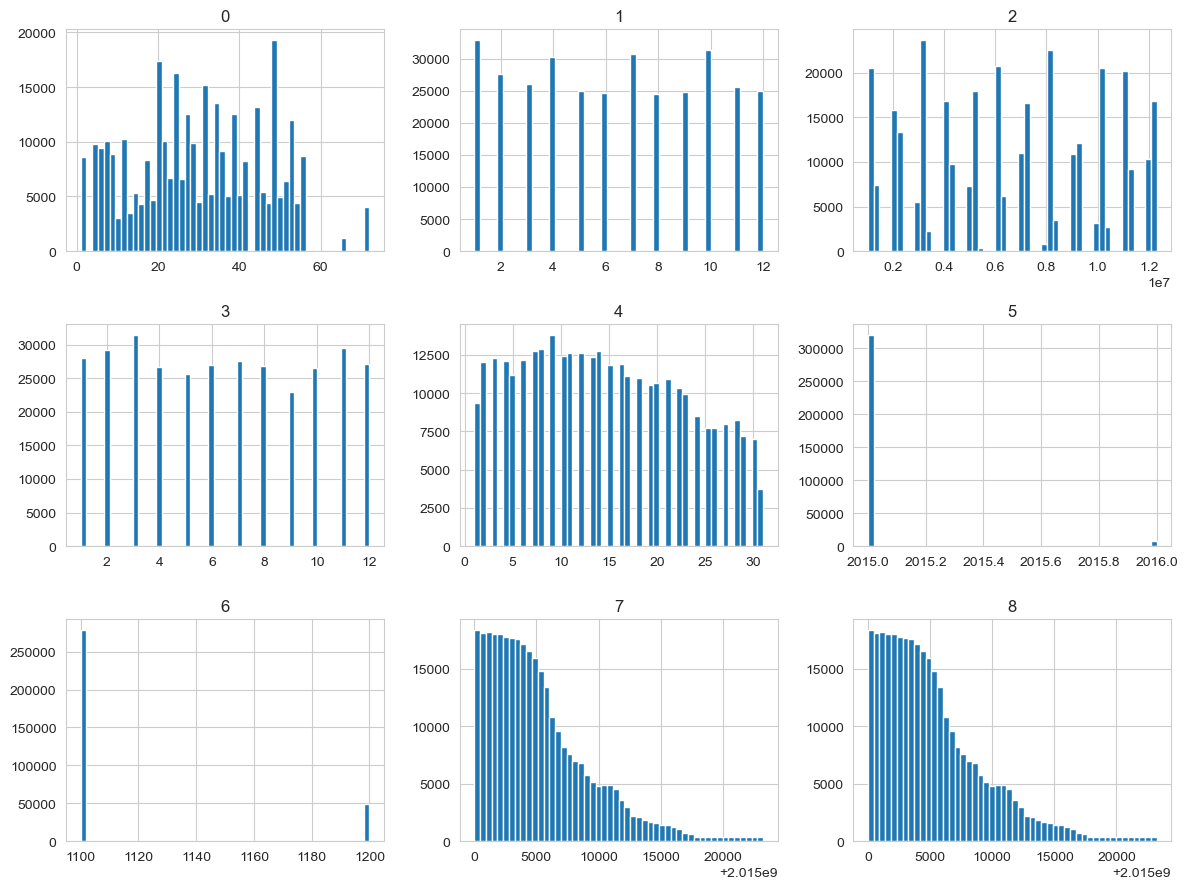

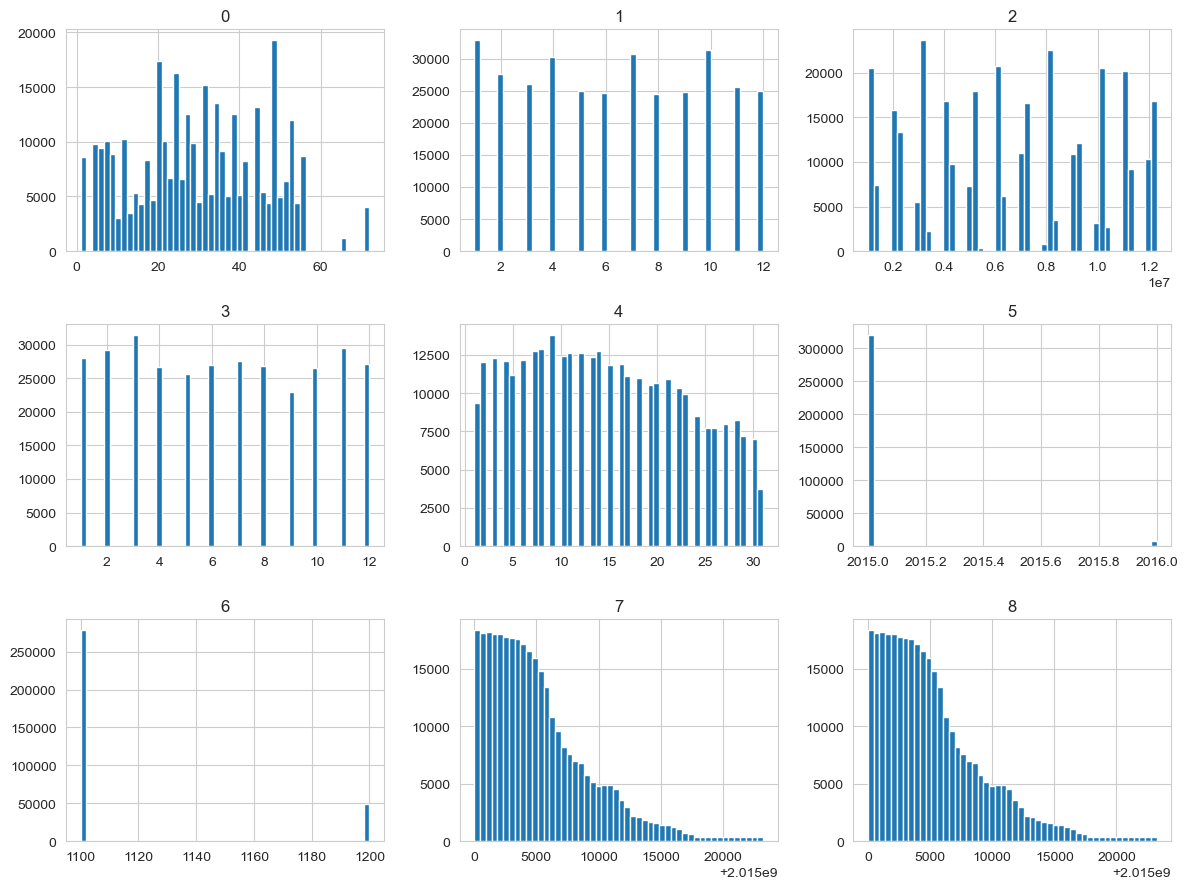

In [ ]:
# Simple correlation / pairwise (only numeric sample)
if len(num_cols) > 1:
    corr = x_train[num_cols[:20]].corr()
    display(corr)

# Histograms for first few numeric features
import matplotlib.pyplot as plt
%matplotlib inline

try:
    plt.style.use('seaborn-whitegrid')
except OSError:
    try:
        import seaborn as sns
        sns.set_style('whitegrid')
    except Exception:
        try:
            plt.style.use('seaborn')
        except Exception:
            plt.style.use('default')

fig, axes = plt.subplots(3, 3, figsize=(12, 9))
for ax, col in zip(axes.ravel(), num_cols[:9]):
    ax.hist(x_train[col].dropna(), bins=50)
    ax.set_title(str(col))
plt.tight_layout()
plt.show()

In [14]:
len([i for i in x_train[0] if i == 72])


4035

## Short conclusions

- Showed dataset sizes and label balance.
- Looked at missing values and basic numeric distributions.
- Next steps: feature engineering, check for outliers, and run a quick baseline model.